# Importing PyTorch

In [1]:
import torch

In [26]:
import torch.nn as nn # It has almost all Layers and Activation functions.
import torch.optim as optim # It has a lot of Optimizers.
import torch.nn.functional as F # It has some Activation Functions as well.

In [27]:
# Importing Other Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Preprocessing data 

- This Section has normal Data loading and Preprocessing Steps.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/pytorch notebooks/Datasets/diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = data.drop('Outcome',axis=1)
Y = data['Outcome']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [9]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((537, 8), (231, 8), (537,), (231,))

# Altering Datatypes for Torch Model Training

- Especially for numeric data all the Independent Features has to be converted to Float Datatype before feeding into the Neural Network.
- All the Dependent values (**Categorical**) has to be in Long datatype, but if the task is **Regression** then it can be float as well. 

In [10]:
X_train = torch.FloatTensor(X_train.values) # Independent features into Float values.
X_test = torch.FloatTensor(X_test.values)
Y_train = torch.LongTensor(Y_train.values)# Dependent feature to Long cause of Discrete Variable.
Y_test = torch.LongTensor(Y_test.values)

# Building an Artificial Neural Network

Creating a Model almost has alot of things to consider but mostly can be divided into two parts:
1. Forward Propagation:
- Creating layers, fixing Neurons and then applying the Activation Functions.
2. Backward Propagation:
- Applying Loss function and then Optimizing the loss using Optimizers.

## Creating Model

### Forward Propagation
- Creating Layers.
- Stacking them together.
- Applying Suitable Activation Functions

In [12]:
class ANN_model(nn.Module): # nn.Module class is being inherited to this class to get all layers.
  def __init__(self, input_feature_shape, hidden1_neurons, hidden2_neurons, hidden3_neurons, out_feature_shape): 
    super().__init__() # Its like Activating the Superclass.
    self.input_layer = nn.Linear(input_feature_shape, hidden1_neurons) # Creating First layer.
    self.fully_connected_layer1 = nn.Linear(hidden1_neurons, hidden2_neurons) # Creating Second Layer and connecting first layer's to second layer using nuerons count
    self.fully_connected_layer2 = nn.Linear(hidden2_neurons, hidden3_neurons) # Another one for connection.
    self.output_layer = nn.Linear(hidden3_neurons, out_feature_shape) # Finally the output layer.

  def forward(self, input_data):
    network_variable = F.relu(self.input_layer(input_data)) # Applying Relu Activation on Layer one
    network_variable = F.relu(self.fully_connected_layer1(network_variable))
    network_variable = F.relu(self.fully_connected_layer2(network_variable)) # Applying Relu Throughout.
    network_variable = self.output_layer(network_variable)
    return network_variable

- Instantiating Model

In [13]:
# INSTANTIATING THE MODEL.

torch.manual_seed(30) # Setting a Seed value to regenerate the same score.

model = ANN_model(8, 10, 20, 10, 2)

- Lets have a look at our model Architecture.

In [14]:
# Lets look at the model Architecture.

print(model.parameters)

<bound method Module.parameters of ANN_model(
  (input_layer): Linear(in_features=8, out_features=10, bias=True)
  (fully_connected_layer1): Linear(in_features=10, out_features=20, bias=True)
  (fully_connected_layer2): Linear(in_features=20, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=2, bias=True)
)>


### Backward Propagation
- Setting up a Loss Function.
- Creating an Optimizer.

- Loss function

In [15]:
loss_function = nn.CrossEntropyLoss()

- Optimizer

In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [68]:
epochs = 200 # Setting up number of epochs.
losses_list_by_iteration = [] # Empty list for appending losses by iteration.
for epoch in range(1, epochs+1): # Iterating for given number of epochs.
  Y_predictions = model.forward(X_train) # Y_predicted values.
  losses = loss_function(Y_predictions, Y_train)
  losses_list_by_iteration.append(losses) # Saving losses by each iteration.
  # Setting verbose to print the loss.
  if epoch%2==0:
    print('for {} epoch, loss is:{}'.format(epoch, losses.item())) # Printing Loss at every two epochs
  optimizer.zero_grad() # Setting up Gradients to zero.
  #losses.requires_grad = True
  losses.backward() # Intializing Backpropagation at this step.
  optimizer.step() # Setting optimizer so that it optimizes once in a Step[Epoch]



for 2 epoch, loss is:0.6664556860923767
for 4 epoch, loss is:0.6549382209777832
for 6 epoch, loss is:0.6669862866401672
for 8 epoch, loss is:0.639873743057251
for 10 epoch, loss is:0.6472535729408264
for 12 epoch, loss is:0.6385658383369446
for 14 epoch, loss is:0.6290763020515442
for 16 epoch, loss is:0.6252018809318542
for 18 epoch, loss is:0.6116812825202942
for 20 epoch, loss is:0.6049554944038391
for 22 epoch, loss is:0.5943712592124939
for 24 epoch, loss is:0.5868808627128601
for 26 epoch, loss is:0.5804291367530823
for 28 epoch, loss is:0.5681299567222595
for 30 epoch, loss is:0.5547816753387451
for 32 epoch, loss is:0.5437042117118835
for 34 epoch, loss is:0.5352350473403931
for 36 epoch, loss is:0.5291313529014587
for 38 epoch, loss is:0.5247220396995544
for 40 epoch, loss is:0.5160149335861206
for 42 epoch, loss is:0.5296186804771423
for 44 epoch, loss is:0.5146409273147583
for 46 epoch, loss is:0.5081028342247009
for 48 epoch, loss is:0.507615864276886
for 50 epoch, loss is:

- Let us plot the results

Text(0, 0.5, 'Training loss')

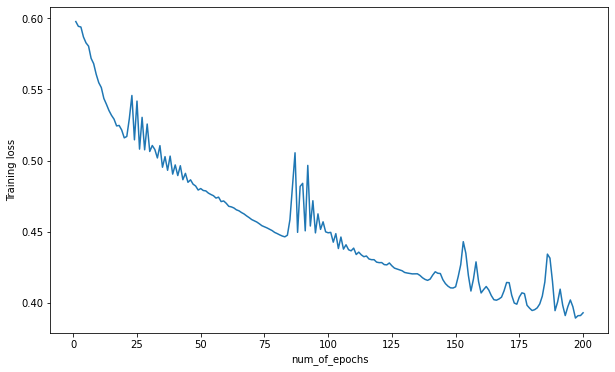

In [46]:
fig = plt.figure(figsize=(10,6))
plt.plot(range(1,201), losses_list_by_iteration);
plt.xlabel('num_of_epochs')
plt.ylabel('Training loss')

- Let us check the losses for both Train and Validation sets at the same time.

In [17]:
epochs = 500 # Setting up number of epochs.
losses_list_by_iteration_train = [] # Empty list for appending losses by iteration.
losses_list_by_iteration_test = []
for epoch in range(1, epochs+1): # Iterating for given number of epochs.

  # For train_data
  Y_train_predictions = model.forward(X_train) # Y_predicted values.
  losses = loss_function(Y_train_predictions, Y_train)
  losses_list_by_iteration_train.append(losses) # Saving losses by each iteration.

  # For test_data.
  Y_test_predictions = model(X_test)
  test_losses = loss_function(Y_test_predictions, Y_test)
  losses_list_by_iteration_test.append(test_losses)

  # Setting verbose to print the loss.
  if epoch%2==0:
    print('for {} epoch, train_loss is:{}, validation_loss is:{}'.format(epoch, losses.item(), test_losses.item())) # Printing Loss at every two epochs
  optimizer.zero_grad() # Setting up Gradients to zero.
  #losses.requires_grad = True
  losses.backward() # Intializing Backpropagation at this step.
  optimizer.step() # Setting optimizer so that it optimizes once in a Step[Epoch]



for 2 epoch, train_loss is:0.6664556860923767, validation_loss is:0.6759584546089172
for 4 epoch, train_loss is:0.6549382209777832, validation_loss is:0.6582744121551514
for 6 epoch, train_loss is:0.6669862866401672, validation_loss is:0.664767861366272
for 8 epoch, train_loss is:0.639873743057251, validation_loss is:0.6407337188720703
for 10 epoch, train_loss is:0.6472535729408264, validation_loss is:0.6517167687416077
for 12 epoch, train_loss is:0.6385658383369446, validation_loss is:0.6421247720718384
for 14 epoch, train_loss is:0.6290763020515442, validation_loss is:0.6301169991493225
for 16 epoch, train_loss is:0.6252018809318542, validation_loss is:0.6285259127616882
for 18 epoch, train_loss is:0.6116812825202942, validation_loss is:0.6233569383621216
for 20 epoch, train_loss is:0.6049554944038391, validation_loss is:0.6228106021881104
for 22 epoch, train_loss is:0.5943712592124939, validation_loss is:0.6096808314323425
for 24 epoch, train_loss is:0.5868808627128601, validation_l

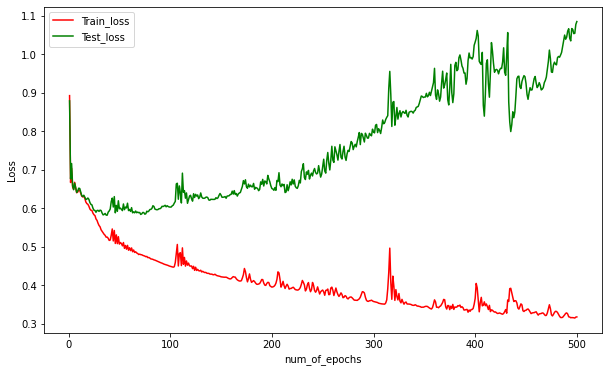

In [18]:
fig = plt.figure(figsize=(10,6))
plt.plot(range(1,501), losses_list_by_iteration_train, 'r', label='Train_loss')
plt.plot(range(1,501), losses_list_by_iteration_test, 'g', label = 'Test_loss')
plt.xlabel('num_of_epochs')
plt.ylabel('Loss')
plt.legend();

## Predictions using Model.

In [19]:
test_set_predictions = model(X_test)

In [21]:
test_set_predictions[0:10]

tensor([[ 3.8020,  3.1891],
        [ 3.4987,  0.8950],
        [ 4.3603,  2.4032],
        [ 4.3995,  2.5264],
        [ 4.3598,  4.4437],
        [ 4.9045,  2.2413],
        [ 4.7709, -0.5285],
        [10.1765, -0.7880],
        [ 5.1659,  5.2347],
        [ 2.8996,  8.5185]], grad_fn=<SliceBackward>)

In [24]:
# Let us use the np.armax function to convert these binary probabilites into numbers.
Final_predictions = []
for i in test_set_predictions.detach().numpy():
  Final_predictions.append(np.argmax(i))

In [25]:
Final_predictions

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

- There we go here are the Predictions as well.

# **THANK YOU**